# Overfitting, Test-Train Splitting, and Cross-Validation
This notebook will discuss overfitting data and cross-validation using the [``numpy``](http://www.numpy.org/), [``matplotlib``](https://matplotlib.org/), and [``scikit-learn``](https://scikit-learn.org/stable/) libraries.

``numpy`` is a scientific computing library for Python. It is "lower level" than other libraries that we'll be using later in this course (in this context "lower level" means "has more nitty-gritty details"). Most of the data science libraries for Python are built on top of ``numpy``.

``matplotlib`` is a visualization library for Python. Its name comes from the fact that was originally based on the plotting functionality of Matlab. Most of the visualization libraries that one will come across in Python are built upon ``matplotlib``.

``scikit-learn`` is a library that has many machine learning algorithms implemented. We will be using ``scikit-learn`` more in the next few examples, but for now we're just using it to split our data.

In [1]:
# Most Python code uses the abbreviation np for numpy
import numpy as np
# Most python code uses the abbreviation plt for matplotlib's pyplot module
import matplotlib.pyplot as plt
# We'll be just using a couple of functions from sklearn's model_selection
# module, so don't bother with an abbreviation.
import sklearn.model_selection

# Our goal

Our goal will be to find the best model to fit our data without over-fitting.

The class of models that we'll be considering is all polynomials, so, a linear fit (1st degree polynomial), a quadratic fit (2nd degree polynomial), a cubic fit (3rd degree polynomial), etc.

To rephrase the above, our goal is to find the number $P$ such that a $P$th degree polynomial is the best model for fitting our data.

The parameters for any given polynomial fit are the coefficients of that polynomial (so, for a line $y=\beta x+\alpha$, the parameters are $\beta$ and $\alpha$). Sometimes this parameter for the model $P$ is called a "hyperparameter", to distinguish it from the parameters of the model.

# Generating our Data
In this example, we'll generate some random data that we'll be using to work on. First, let's create a variable ``n`` for the number of data points we'll have

In [2]:
n = 30

While we want our data to be random, for our purposes in this example we will want the data that we get to be repeatable (otherwise we could never have slides that use the same data as our notebook!). To do this, we set something called a random seed using [``np.random.seed``](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.seed.html). This ensures that when we generate random data using ``np.random``, we will always get the same thing. Here we use 7 as an arbitrary choice (not really, it's my favorite number).

In [3]:
np.random.seed(7)

If we want to start getting truly (or, less predictable) random numbers again, then we would just call ``np.random.seed()`` with no parameters.

## The x values

Let's define ``x`` to be a set of points selected uniformly at random from the interval $[0, 3.14)$, using the [``np.random.uniform``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) function.

In [4]:
x = np.random.uniform(0,3.14,n)
x

array([ 0.23960803,  2.44894501,  1.37660499,  2.27168066,  3.07088707,
        1.69087703,  1.57351826,  0.22624056,  0.8428984 ,  1.56963105,
        2.13278219,  2.52374057,  1.19615516,  0.20704013,  0.90477718,
        2.85612368,  0.67003001,  1.41966924,  2.9239869 ,  0.07818357,
        1.8857236 ,  2.98340663,  0.72315104,  1.72225835,  2.8546631 ,
        0.41815206,  1.6435155 ,  2.35628696,  2.10070158,  1.46874398])

Note that the first number in the series should be 0.23960803.

## The y values
Let's define ``y`` using the function $y=\sin(x)$ with some normally distributed noise added. The normally distributed noise is generated using the [``np.random.normal``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function. We'll have the noise's distribution be centered at $0$ and have a standard deviation of $0.2$.

In [5]:
np.random.seed(1)
y = np.sin(x)+np.random.normal(0, 0.1, n)
y

array([ 0.39975641,  0.57740129,  0.92838686,  0.65697532,  0.15718745,
        0.7626451 ,  1.17447747,  0.14819479,  0.77847847,  0.97506228,
        0.99240937,  0.3732716 ,  0.89839727,  0.16715871,  0.89966445,
        0.17161835,  0.60376669,  0.90081618,  0.22011383,  0.13638547,
        0.84075699,  0.27199951,  0.75190944,  1.03880097,  0.37309424,
        0.33769964,  0.9850681 ,  0.61346445,  0.83606616,  1.04783272])

Note that the first number should be 0.39975641.

## Plotting the data
Let's create a scatterplot of the data using the [``plt.scatter``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function.

One thing to note about ``matplotlib`` is that each call to ``plt`` will draw additional things on to your "current" plot. Only once you have drawn everything you need should you call [``plt.show``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html), which will make the plot appear on-screen.

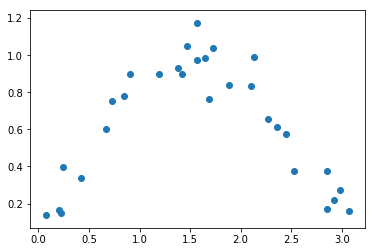

In [6]:
plt.scatter(x, y)
plt.show()

# Fitting Various Models to Our Data

## Linear regression

In this section we will fit the data to a line. In future examples we'll use more sophisticated regressions packages from ``statsmodels``, but for now we will just use the [``np.polyfit``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function.

### Computing the linear fit

When we call ``np.polyfit`` with our data, it will return a ``np.array`` with the polynomial coefficients, which we convert to a [``np.poly1d``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), which is ``numpy``'s polynomial class.

In [7]:
linear_fit_coefficients = np.polyfit(x, y, deg=1)
print(linear_fit_coefficients)

[-0.01810923  0.66316613]


In [8]:
linear_fit = np.poly1d(linear_fit_coefficients)
print('y = ')
print(linear_fit)

y = 
 
-0.01811 x + 0.6632


### Computing RMSE

We'll be using the function [``np.polyval``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to evaluate our polynomial. Let's see what the ``y_predicted`` or $\hat y$ value would be.

In [9]:
y_predicted = np.polyval(linear_fit, x)
y_predicted

array([ 0.65882701,  0.61881762,  0.63823687,  0.62202774,  0.60755473,
        0.63254565,  0.63467092,  0.65906909,  0.64790189,  0.63474132,
        0.62454308,  0.61746313,  0.64150468,  0.65941679,  0.64678131,
        0.61144393,  0.6510324 ,  0.63745701,  0.61021498,  0.66175029,
        0.62901713,  0.60913893,  0.65007042,  0.63197736,  0.61147038,
        0.65559372,  0.63340333,  0.62049558,  0.62512404,  0.63656831])

We can compute the residual for each sample by just subtracting one from the other.

In [10]:
linear_fit_residual = y - y_predicted
linear_fit_residual

array([-0.2590706 , -0.04141633,  0.29014999,  0.03494758, -0.45036728,
        0.13009945,  0.53980655, -0.5108743 ,  0.13057658,  0.34032097,
        0.36786629, -0.24419152,  0.25689259, -0.49225808,  0.25288314,
       -0.43982557, -0.04726571,  0.26335917, -0.39010114, -0.52536482,
        0.21173986, -0.33713942,  0.10183902,  0.40682362, -0.23837613,
       -0.31789408,  0.35166478, -0.00703113,  0.21094212,  0.41126442])

Let's compute the RMSE, since that will give us a single value for our fit.

We'll compute the "root" part of RMSE using ``np.sqrt``, the "mean" part of RMSE using ``np.mean``, and the "square" part of RMSE using ``np.square`` as follows.

In [11]:
linear_fit_rmse = np.sqrt(np.mean(np.square(linear_fit_residual)))
print("Linear fit RMSE = " + str(linear_fit_rmse))

Linear fit RMSE = 0.324000944852


### Plotting the fit

A more intuitive way to look at a fit would be to plot it next to the data that we want to view.

To do this, we will need to create data for the $x$ values line. Let's call this ``x_line``, and use [``np.arange``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) to set it to be taking 200 samples from ``x.min()`` to ``x.max()``.

In [12]:
x_line_step = (x.max() - x.min()) / 200
x_line = np.arange(x.min(), x.max(), x_line_step)
print(x_line)

[ 0.07818357  0.09314709  0.10811061  0.12307413  0.13803764  0.15300116
  0.16796468  0.1829282   0.19789171  0.21285523  0.22781875  0.24278227
  0.25774578  0.2727093   0.28767282  0.30263634  0.31759985  0.33256337
  0.34752689  0.36249041  0.37745392  0.39241744  0.40738096  0.42234448
  0.43730799  0.45227151  0.46723503  0.48219855  0.49716206  0.51212558
  0.5270891   0.54205262  0.55701613  0.57197965  0.58694317  0.60190669
  0.6168702   0.63183372  0.64679724  0.66176076  0.67672427  0.69168779
  0.70665131  0.72161483  0.73657834  0.75154186  0.76650538  0.7814689
  0.79643241  0.81139593  0.82635945  0.84132297  0.85628648  0.87125
  0.88621352  0.90117704  0.91614055  0.93110407  0.94606759  0.9610311
  0.97599462  0.99095814  1.00592166  1.02088517  1.03584869  1.05081221
  1.06577573  1.08073924  1.09570276  1.11066628  1.1256298   1.14059331
  1.15555683  1.17052035  1.18548387  1.20044738  1.2154109   1.23037442
  1.24533794  1.26030145  1.27526497  1.29022849  1.3051

Now we can plot the our data and the prediction together. We'll use ``np.polyval`` to evaluate ``linear_fit`` at ``x_line``.

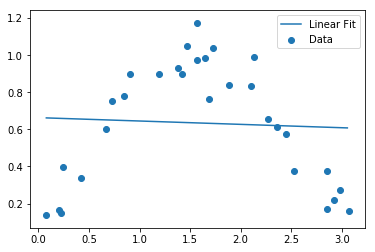

In [13]:
plt.scatter(x, y, label='Data')
plt.plot(x_line, np.polyval(linear_fit, x_line), label='Linear Fit')
plt.legend()
plt.show()

Do you feel like this fit captures the underlying trend of the data? 

## Quadratic fit

The linear fit doesn't fit our data very well. So maybe we can do better if we try to fit a slightly more complicated model -- a quadratic polynomial. We can do this again with ``np.polyfit``, with the only difference being that we'll use ``deg=2``.

In [14]:
quadratic_fit = np.poly1d(np.polyfit(x, y, deg=2))
print('y = ')
print(quadratic_fit)

y = 
         2
-0.3951 x + 1.229 x + 0.003469


This is a not-very-pretty display of our polynomial's equation. Let's see what the RMSE looks like.




In [15]:
quadratic_fit_residual = y - np.polyval(quadratic_fit, x)
quadratic_fit_rmse = np.sqrt(np.mean(np.square(quadratic_fit_residual)))
print("Quadratic fit RMSE = " + str(quadratic_fit_rmse))

Quadratic fit RMSE = 0.102788774203


And let's remember our linear error from before.

In [16]:
print("Linear fit RMSE = " + str(linear_fit_rmse))

Linear fit RMSE = 0.324000944852


And let's take a look at the graph.

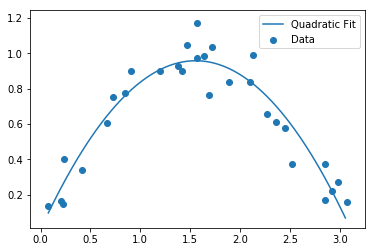

In [17]:
plt.plot(x_line, np.polyval(quadratic_fit, x_line), label='Quadratic Fit')
plt.scatter(x, y, label='Data')
plt.legend()
plt.show()

That's great! If going from $x$ to $x^2$ was good, then maybe $x^3$ is better! Maybe $x^4$ is better!

### Creating a function

We'll be running the same code over and over and over again, so it'll be convenient to write a function to do it for us. Let's write the function ``FitPolynomial``, which will have ``P`` be the degree of our polynomial to fit.

In [18]:
def FitPolynomial(P):
  # Compute and print the polynomial fit!
  degree_P_fit = np.poly1d(np.polyfit(x, y, deg=P))
  print('y = ')
  print(degree_P_fit)
  # Compute and print the RMSE
  degree_P_fit_residual = y - np.polyval(degree_P_fit, x)
  degree_P_fit_rmse = np.sqrt(np.mean(np.square(degree_P_fit_residual)))
  print(str(P) + 'th degree fit RMSE = ' + str(degree_P_fit_rmse))
  # Plot the fit
  plt.plot(x_line, np.polyval(degree_P_fit, x_line), label=str(P) + 'th Degree Fit')
  plt.scatter(x, y, label='Data')
  # Use the function plt.ylim to ensure that we see the same y axis for every
  # (we'll see why shortly)
  plt.ylim([y.min(), y.max()])
  plt.legend()
  plt.show()

## Cubic fit

y = 
         3          2
0.05719 x - 0.6673 x + 1.571 x - 0.08152
3th degree fit RMSE = 0.0980390575095


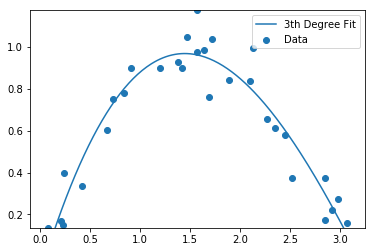

In [19]:
FitPolynomial(3)

## 4th degree fit

y = 
         4          3          2
0.08514 x - 0.4812 x + 0.4359 x + 0.7761 x + 0.04794
4th degree fit RMSE = 0.0914895931649


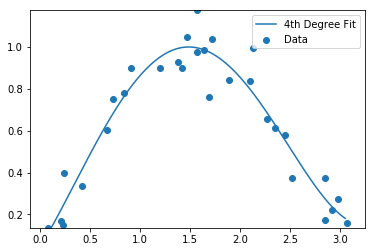

In [20]:
FitPolynomial(4)

## 6th degree fit

y = 
         6          5         4         3         2
0.04937 x - 0.4542 x + 1.672 x - 3.099 x + 2.492 x + 0.1052 x + 0.1093
6th degree fit RMSE = 0.0904226204391


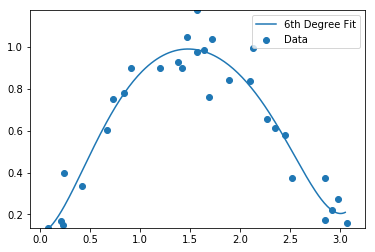

In [21]:
FitPolynomial(6)

## 9th degree fit

y = 
          9          8          7          6         5         4
-0.03745 x + 0.3441 x - 0.8893 x - 0.9164 x + 8.778 x - 17.13 x
          3         2
 + 14.38 x - 5.058 x + 1.381 x + 0.05088
9th degree fit RMSE = 0.0856187231447


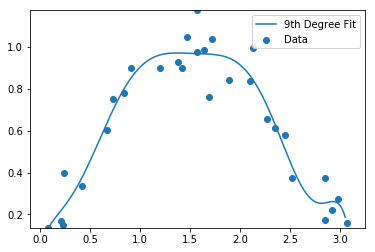

In [22]:
FitPolynomial(9)

## 12th degree fit

y = 
        12         11         10       9        8        7        6
0.8077 x  - 15.31 x  + 127.5 x  - 614 x + 1891 x - 3894 x + 5437 x
         5        4        3         2
 - 5116 x + 3165 x - 1226 x + 274.7 x - 29.98 x + 1.279
12th degree fit RMSE = 0.0817045583697


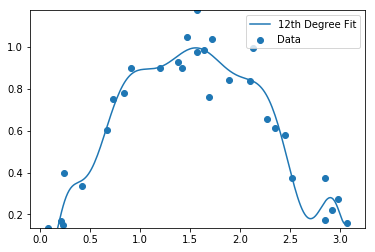

In [23]:
FitPolynomial(12)

What about this fit? Does it still look good to you?

## 16th degree fit

y = 
       16         15         14        13             12             11
2.016 x  - 51.97 x  + 610.1 x  - 4321 x  + 2.061e+04 x  - 6.997e+04 x 
              10             9             8             7
 + 1.745e+05 x  - 3.247e+05 x + 4.543e+05 x - 4.772e+05 x
              6             5             4             3        2
 + 3.732e+05 x - 2.134e+05 x + 8.667e+04 x - 2.382e+04 x + 4083 x - 375.6 x + 13.24
16th degree fit RMSE = 0.0747945336178


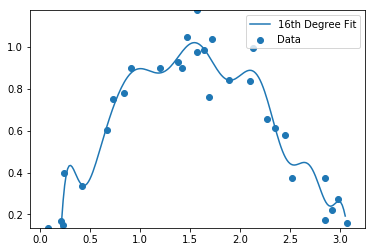

In [24]:
FitPolynomial(16)

## Finding the Best Hyperparameter

But our RMSE has kept going down!

Let's plot polynomial degree on the X axis versus RMSE on the Y axis all the way through from degree 0 (a constant) through a degree 16 polynomial.

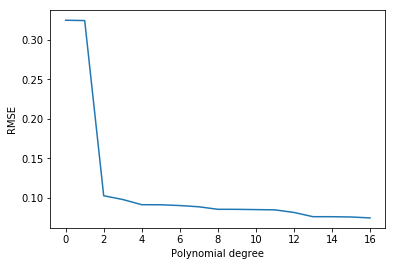

In [25]:
# This is going to be our X data. Let's call it degrees and set it to all of
# the degrees we will check, from 0 through 16.
degrees = np.arange(17)

# This is going to be our Y data. It will be the RMSE for each degree. We don't
# know the values yet (we will compute them), so let's initialize it to zero.
rmse_for_degree = np.zeros(17)

# And for each degree, let's compute the RMSE
for P in degrees:
  degree_P_fit = np.poly1d(np.polyfit(x, y, deg=P))
  residual = y - np.polyval(degree_P_fit, x)
  rmse = np.sqrt(np.mean(np.square(residual)))
  # Save the RMSE in our Y data
  rmse_for_degree[P] = rmse

# And let's plot the results.
plt.plot(degrees, rmse_for_degree)
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.show()

Our original goal was to find the best hyperparameter (the polynomial degree that is the best fit for our data), but it's not clear from this graph what that is!

# Training/Test Split

In this section, we'll split our data into two sets -- one for testing and one for training. We'll tune our hyperparameter by evaluating how a model trained on the training set performs on the testing set.

## Splitting the data

Here we produce a set of indices for training and testing. We do this by using the [``sklearn.model_selection.train_test_split``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

We'll split the indices evently using the ``test_size`` parameter. The ``random_state`` parameter sets the random seed for the operation.

In [26]:
train, test = sklearn.model_selection.train_test_split(
    np.arange(n), test_size=0.5, random_state=1)
print('Training set indices:')
print(train)
print('Test set indices:')
print(test)

Training set indices:
[18 13  7 27  1 16  0 15 29 28  9  8 12 11  5]
Test set indices:
[17 21 10 19 14 20 26  3 24 22 23  4  2 25  6]


Let's visualize the split by plotting the training and the testing data in different colors.

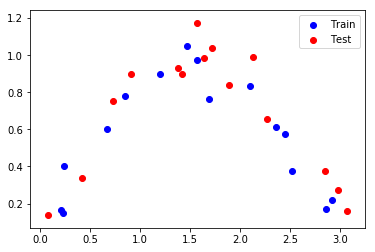

In [27]:
plt.scatter(x[train], y[train], label='Train', c='b')
plt.scatter(x[test], y[test], label='Test', c='r')
plt.legend()
plt.show()

## Linear fit

Now let's compute a linear (``deg=1``) fit on the training data, and look at its plot.

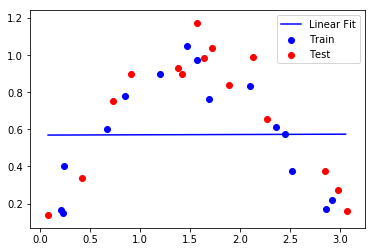

In [28]:
# Compute our linear fit (using p as our variable, for brevity)
p = np.poly1d(np.polyfit(x[train], y[train], deg=1))
# Plot the fit
plt.scatter(x[train], y[train], label='Train', c='b')
plt.scatter(x[test], y[test], label='Test', c='r')
plt.plot(x_line, np.polyval(p, x_line), label='Linear Fit', c='b')
plt.legend()
plt.show()

Let's compute the RMSE for this model on the training data and the testing data.

In [29]:
train_residual = y[train] - np.polyval(p, x[train])
train_rmse = np.sqrt(np.mean(np.square(train_residual)))
print("RMSE training data = " + str(train_rmse))
test_residual = y[test] - np.polyval(p, x[test])
test_rmse = np.sqrt(np.mean(np.square(test_residual)))
print("RMSE testing data = " + str(test_rmse))

RMSE training data = 0.299292451915
RMSE testing data = 0.358861105553


## Creating a function

As before, we're going to take a look at how this performs for many different polynomial degrees. Let's create a function to do the repetetive work for us.

In [30]:
def FitPolynomailToTrainTestSplit(P):
  # Compute our polynomial fit
  degree_P_fit = np.poly1d(np.polyfit(x[train], y[train], deg=P))
  
  # Plot the fit
  plt.scatter(x[train], y[train], label='Train', c='b')
  plt.scatter(x[test], y[test], label='Test', c='r')
  plt.plot(x_line, np.polyval(degree_P_fit, x_line),
           label='Degree ' + str(P) + ' Fit', c='b')
  plt.legend()
  plt.show()
  
  # Compute and print the RMSE
  train_residual = y[train] - np.polyval(degree_P_fit, x[train])
  train_rmse = np.sqrt(np.mean(np.square(train_residual)))
  print("RMSE training data = " + str(train_rmse))
  test_residual = y[test] - np.polyval(degree_P_fit, x[test])
  test_rmse = np.sqrt(np.mean(np.square(test_residual)))
  print("RMSE testing data = " + str(test_rmse))

## Quadratic fit

Let's run the same code as before, now with ``deg=2``.

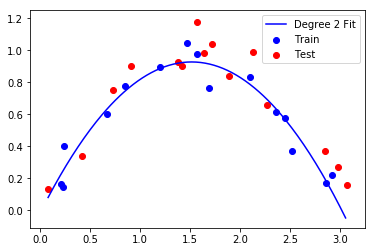

RMSE training data = 0.085122865579
RMSE testing data = 0.142292234797


In [31]:
FitPolynomailToTrainTestSplit(2)

Indeed the RMSE is going down like before, for both the training and testing sets.

## 8th degree fit

Let's do the same thing, now with a 8th degree polynomial.

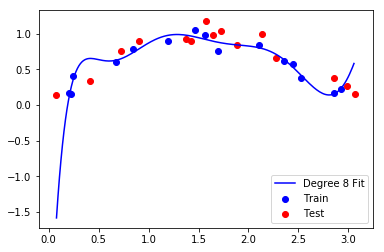

RMSE training data = 0.0629294062077
RMSE testing data = 0.484638990204


In [32]:
FitPolynomailToTrainTestSplit(8)

Something interesting has happened here! Our training data's error is going down, but our testing data has spiked up!

And if we look at our plot, the line fits the blue dots well, but is missing the red dots by a lot!

## Finding the Best Hyperparameter (again!)

Let's plot the training and testing RMSE as a function of the degree of our fit, just like we did before

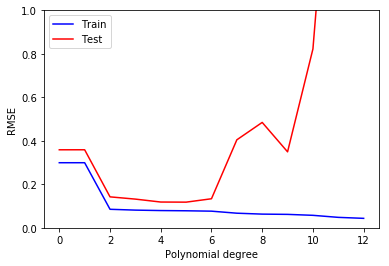

In [33]:
# This is going to be our X data. Like last time, it's the degrees we'll test,
# this time 0 through 12.
degrees = np.arange(13)

# This is going to be our Y data. We have two plots now, the RMSE for training
# data and RMSE for test data.
train_rmse_for_degree = np.zeros(len(degrees))
test_rmse_for_degree = np.zeros(len(degrees))

# And for each degree, let's compute the RMSE
for P in degrees:
  # Compute our fit
  degree_P_fit = np.poly1d(np.polyfit(x[train], y[train], deg=P))

  # Compute our residual and RMSE for training and testing
  train_residual = y[train] - np.polyval(degree_P_fit, x[train])
  train_rmse = np.sqrt(np.mean(np.square(train_residual)))
  test_residual = y[test] - np.polyval(degree_P_fit, x[test])
  test_rmse = np.sqrt(np.mean(np.square(test_residual)))
  
  # Save the RMSE in our Y axis data
  train_rmse_for_degree[P] = train_rmse
  test_rmse_for_degree[P] = test_rmse

  # And let's plot the results.
plt.plot(degrees, train_rmse_for_degree, c='b', label='Train')
plt.plot(degrees, test_rmse_for_degree, c='r', label='Test')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.ylim([0, 1])
plt.legend()
plt.show()

This gives us a clearer picture of what range of hyperparameters may be best for this data.

# k-Fold Cross-Validation

In the above example, we dividied our data at random into 2 sets -- one for training and one for testing.

For cross-validation, the training data is divided into folds, each of which is treated as its own validation data set, using all of the other training data as its training data set.

We can use the [``sklearn.model_selection.KFold``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to generate mutliple folds for testing.

In this example, let's do 4-Fold Cross-Validation

## Visualizing the split

Let's print out the 4 different sets of test and training indices that we'll use. For each fold, the training indices are everything not being used for testing.

Fold 0 validation indices: 
[ 7 16 29  9]
Fold 0 training indices: 
[18 13 27  1  0 15 28  8 12 11  5]

Fold 1 validation indices: 
[18 13 12  5]
Fold 1 training indices: 
[ 7 27  1 16  0 15 29 28  9  8 11]

Fold 2 validation indices: 
[27 15  8 11]
Fold 2 training indices: 
[18 13  7  1 16  0 29 28  9 12  5]

Fold 3 validation indices: 
[ 1  0 28]
Fold 3 training indices: 
[18 13  7 27 16 15 29  9  8 12 11  5]



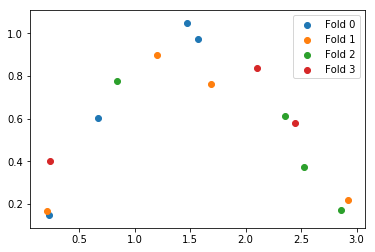

In [34]:
# kf is what we will use to iterate over our splits
n_folds = 4
kf_xval = sklearn.model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=7)

# We'll want to label each fold as 0, 1, 2, 3 while we print the data, so use
# fold_index for that
fold_index = 0
for fold_train_index, fold_valid_index in kf_xval.split(train):
  # fold_train_index, fold_valid_index are the indices from 0 through 15.
  # Convert them to indices in our training data.
  fold_train = train[fold_train_index]
  fold_valid = train[fold_valid_index]

  # Plot the fold's valiation data points
  plt.scatter(x[fold_valid], y[fold_valid], label='Fold ' + str(fold_index))

  # Print the indices that we'll use for training and validation for this
  # fold.
  print('Fold ' + str(fold_index) + ' validation indices: ')
  print(fold_valid)
  print('Fold ' + str(fold_index) + ' training indices: ')
  print(fold_train)
  print('')

  # Increment our fold index.
  fold_index += 1

# Show the plot
plt.legend()
plt.show()

## Finding the best Hyperparameter (again again!)

In the code below, we try all of our different degree fits on the above sets, and we plot the resulting error for each.

Our X axis is polynomial degree. On the Y axis we'll have the mean training fit and the mean validation fit.

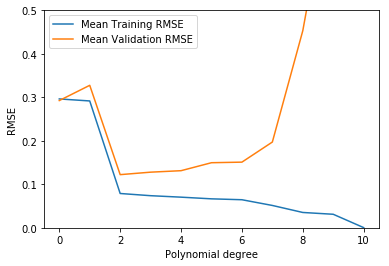

In [35]:
# This is going to be our X data. Like last time, it's the degrees we'll test.
degrees = np.arange(11)

# This is going to be our Y data. We have two plots now, the RMSE for training
# data and RMSE for test data. Because we need to take the mean of the RMSE for
# all folds, we'll create a matrix with entries for each degree and each fold.
train_rmse_for_degree = np.zeros([len(degrees), n_folds])
valid_rmse_for_degree = np.zeros([len(degrees), n_folds])

# We'll use fold_index to keep track of which fold we're on, so we know which
# entry to save it in.
fold_index = 0

# Iterate over every training/validation split
for fold_train_index, fold_valid_index in kf_xval.split(train):
  # Get the indices for this fold's training and validation from the
  # larger training set.
  fold_train = train[fold_train_index]
  fold_valid = train[fold_valid_index]

  # Iterate over every polynomial degree P (this is now exactly like before)
  for P in degrees:
    # Fit the degree P polynomial using the fold's training data
    degree_P_fit = np.poly1d(np.polyfit(x[fold_train], y[fold_train], deg=P))

    # Compute the residual and RMSE for training and validation
    train_residual = y[fold_train] - np.polyval(degree_P_fit, x[fold_train])
    valid_residual = y[fold_valid] - np.polyval(degree_P_fit, x[fold_valid])
    train_rmse = np.sqrt(np.mean(np.square(train_residual)))
    valid_rmse = np.sqrt(np.mean(np.square(valid_residual)))
    
    # Save the RMSE
    train_rmse_for_degree[P, fold_index] = train_rmse
    valid_rmse_for_degree[P, fold_index] = valid_rmse

  # Increment the index for the fold we're on.
  fold_index += 1

# Now let's get the mean training and validation RMSE across all folds
mean_train_rmse_for_degree = np.mean(train_rmse_for_degree,1)
mean_valid_rmse_for_degree = np.mean(valid_rmse_for_degree,1)
  
# And let's plot them!
plt.plot(degrees, mean_train_rmse_for_degree, label='Mean Training RMSE')
plt.plot(degrees, mean_valid_rmse_for_degree, label='Mean Validation RMSE')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

## Evaluating the model on the test data

From the above plot, a degree $P=2$ fit is the best hyperparameter selection. Let's now train our model on all training data using that hyperparameter, and evaluate it on the test set.



In [36]:
best_P = 2
best_P_fit = np.poly1d(np.polyfit(x[train], y[train], deg=best_P))

best_P_test_residual = y[test] - np.polyval(best_P_fit, x[test])
best_P_test_rmse = np.sqrt(np.mean(np.square(best_P_test_residual)))

print('P=2 Test RMSE = ' + str(best_P_test_rmse))

P=2 Test RMSE = 0.142292234797


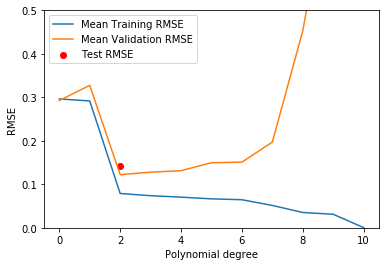

In [37]:
# And let's everything together!
plt.plot(degrees, mean_train_rmse_for_degree, label='Mean Training RMSE')
plt.plot(degrees, mean_valid_rmse_for_degree, label='Mean Validation RMSE')
plt.scatter([best_P], [best_P_test_rmse], label='Test RMSE', c='r')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

# Leave-one-out cross validation

Try modifying the $k-$fold cross validation example above to use a [``LeaveOneOut``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html) cross-validator instead.

In [38]:
# We used kf_xval before. Let's use xf_loocv
loo_xval = sklearn.model_selection.LeaveOneOut()

# the number of folds we'll have now is the length of the training data.
n_folds = len(train)

# Copy-pase what we did for k-fold cross validation here, now using loo_xval
# instead of kf_xval. How does it compare?

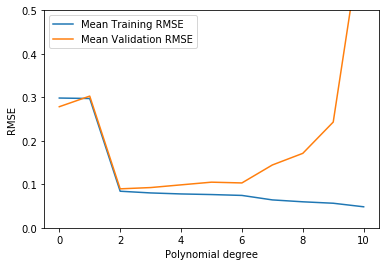

In [39]:
# This is going to be our X data. Like last time, it's the degrees we'll test.
degrees = np.arange(11)

# This is going to be our Y data. We have two plots now, the RMSE for training
# data and RMSE for test data. Because we need to take the mean of the RMSE for
# all folds, we'll create a matrix with entries for each degree and each fold.
train_rmse_for_degree = np.zeros([len(degrees), n_folds])
valid_rmse_for_degree = np.zeros([len(degrees), n_folds])

# We'll use fold_index to keep track of which fold we're on, so we know which
# entry to save it in.
fold_index = 0

# Iterate over every training/validation split
for fold_train_index, fold_valid_index in loo_xval.split(train):
  # Get the indices for this fold's training and validation from the
  # larger training set.
  fold_train = train[fold_train_index]
  fold_valid = train[fold_valid_index]

  # Iterate over every polynomial degree P (this is now exactly like before)
  for P in degrees:
    # Fit the degree P polynomial using the fold's training data
    degree_P_fit = np.poly1d(np.polyfit(x[fold_train], y[fold_train], deg=P))

    # Compute the residual and RMSE for training and validation
    train_residual = y[fold_train] - np.polyval(degree_P_fit, x[fold_train])
    valid_residual = y[fold_valid] - np.polyval(degree_P_fit, x[fold_valid])
    train_rmse = np.sqrt(np.mean(np.square(train_residual)))
    valid_rmse = np.sqrt(np.mean(np.square(valid_residual)))
    
    # Save the RMSE
    train_rmse_for_degree[P, fold_index] = train_rmse
    valid_rmse_for_degree[P, fold_index] = valid_rmse

  # Increment the index for the fold we're on.
  fold_index += 1

# Now let's get the mean training and validation RMSE across all folds
mean_train_rmse_for_degree = np.mean(train_rmse_for_degree,1)
mean_valid_rmse_for_degree = np.mean(valid_rmse_for_degree,1)
  
# And let's plot them!
plt.plot(degrees, mean_train_rmse_for_degree, label='Mean Training RMSE')
plt.plot(degrees, mean_valid_rmse_for_degree, label='Mean Validation RMSE')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.ylim([0, 0.5])
plt.legend()
plt.show()